### Clustering Assignment
__Description:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.__ 

## Read and visualise the data

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset 

Country_df=pd.read_csv("C://Users//Ankur//Downloads//CaseStudy-NGO//Country-data.csv")

Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
Country_df.shape

(167, 10)

In [4]:
# Check the datatype of the columns

Country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- __All Attributes are numerical except for one column__

## Prepare the data for modelling

In [5]:
# Cheecking for missing values

Country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- __No missing values present in dataset__

In [6]:
#Converting exports,imports and health spending percentages to absolute values.
# Data Quality Check
Country_df['exports'] = Country_df['exports']*Country_df['gdpp']/100
Country_df['imports'] = Country_df['imports']*Country_df['gdpp']/100
Country_df['health'] = Country_df['health']*Country_df['gdpp']/100

In [7]:
Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Data Visualisation

In [8]:
Country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
col = list(Country_df.columns)
col

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [10]:
col = col[1:]
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

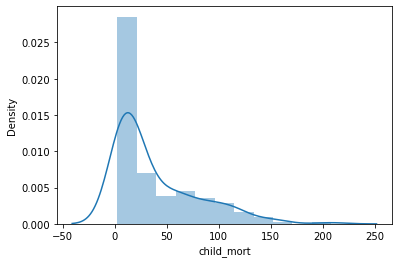

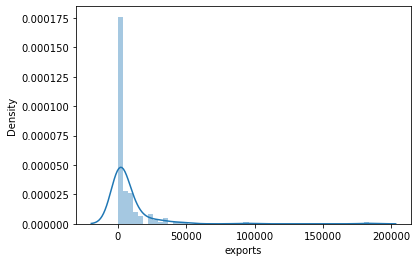

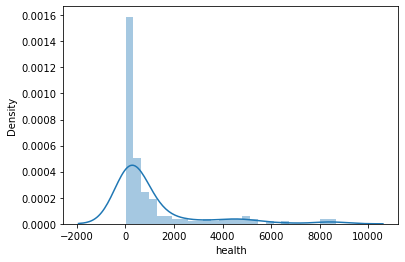

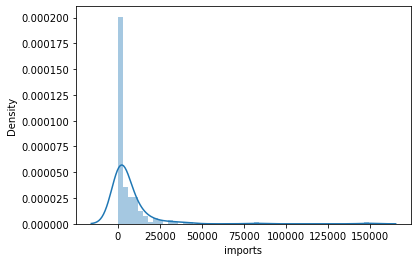

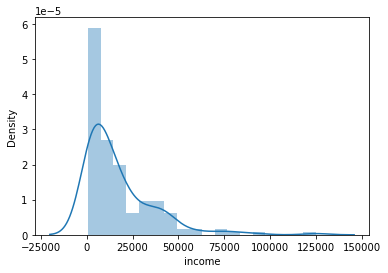

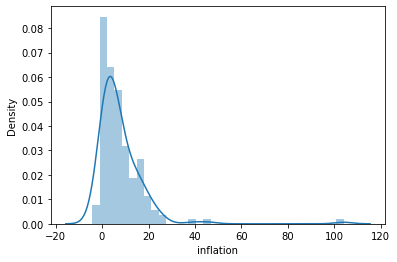

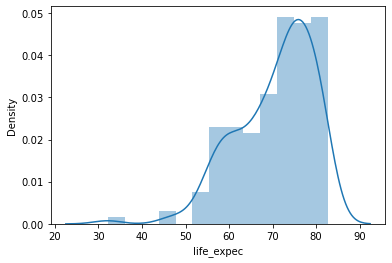

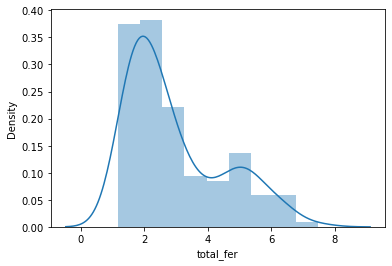

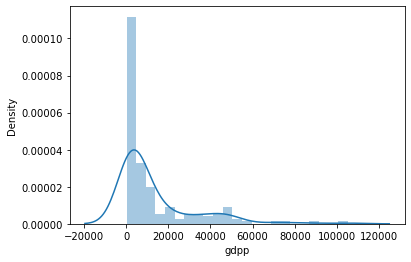

In [11]:
for c in col:
    sns.distplot(Country_df[c])
    plt.show();

__Child mortality, Income and GDPP are normally distributed which means that there are lesser chances for any internal grouping.__ 

<AxesSubplot:title={'center':'Correlation of the variables - countries'}>

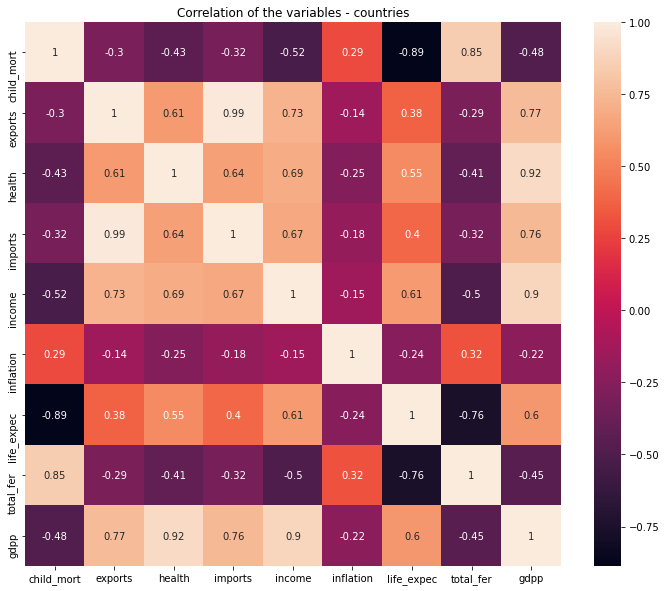

In [12]:
# Plotting heat map to see the correlation of the dataset

plt.figure(figsize=(12,10))
plt.title("Correlation of the variables - countries")
sns.heatmap(Country_df.corr(),annot = True)

- __From HeatMap it is observed that some values are highly correlated__ 

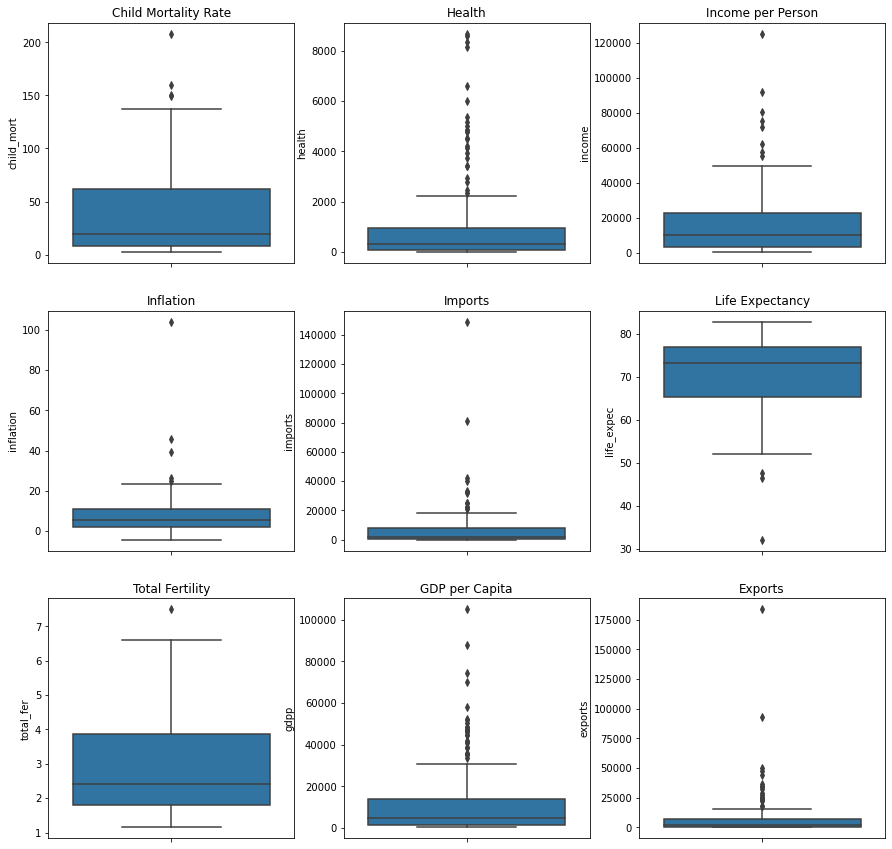

In [13]:
# Ploting box-plot for checking the outliers
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(y=Country_df.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')

sns.boxplot(y=Country_df.health,ax=ax[0, 1])
ax[0, 1].set_title('Health')

sns.boxplot(y=Country_df.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')

sns.boxplot(y=Country_df.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')

sns.boxplot(y=Country_df.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')

sns.boxplot(y=Country_df.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')

sns.boxplot(y=Country_df.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')

sns.boxplot(y=Country_df.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')

sns.boxplot(y=Country_df.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

- __It is observed that Health, GDP per capita, Exports has so many outliers. It is prefered to remove outliers but we are not going to do this__

In [14]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [15]:
# How different your date is from the randomly scattered data?

hopkins(Country_df.drop('country', axis=1))

0.957330658143173

## Scaling Data

It is good to scale the data set as some values are large and some are small so better to scaled them all

In [16]:
#The final matrix would only contain the data columns. Hence let's drop the country column
Country=Country_df.drop(['country'],axis=1)
Country.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [17]:
#Let's fit the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(Country)
scaled_df=pd.DataFrame(scaled,columns=Country.columns)
scaled_df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [18]:
scaled_df.shape

(167, 9)

## K-Means Clustering With Outliers
K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The working of the alorithms is as follows:

First we initialize k points called means randomly.
Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far. Then We repeat the process for a given number of iterations and at the end.

In [19]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=5)

In [20]:
kmeans.labels_

array([4, 0, 0, 4, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 4,
       0, 3, 0, 4, 4, 0, 4, 3, 0, 4, 4, 0, 0, 0, 4, 4, 4, 0, 4, 0, 3, 0,
       3, 0, 0, 0, 0, 4, 4, 0, 0, 3, 3, 4, 4, 0, 3, 4, 3, 0, 0, 4, 4, 0,
       4, 0, 3, 0, 0, 0, 4, 3, 3, 3, 0, 3, 0, 0, 4, 4, 3, 0, 4, 0, 0, 4,
       4, 0, 0, 1, 0, 4, 4, 0, 0, 4, 3, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0,
       3, 3, 4, 2, 3, 0, 4, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 0, 0, 4, 0, 0,
       4, 1, 0, 3, 4, 4, 0, 3, 0, 0, 4, 0, 3, 3, 0, 4, 0, 4, 4, 0, 0, 0,
       0, 4, 0, 3, 3, 3, 0, 0, 0, 0, 0, 4, 4])

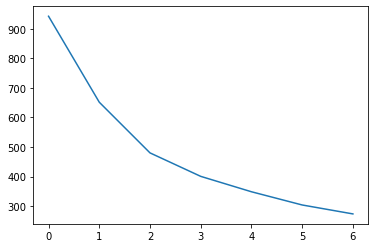

In [21]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

- __As we can see the elbow or a knee like bend is at 3.So choosing 3 as a number of clusters__

In [22]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=111)

In [23]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()


2    91
1    48
0    28
dtype: int64

In [24]:
from sklearn import metrics
from sklearn.metrics import silhouette_score


In [25]:
metrics.silhouette_score(scaled_df, kmeans.labels_)

0.4218615812599681

## Prediction

In [26]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)

In [27]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(Country_df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,2


## Visualization of clusters

<AxesSubplot:title={'center':'GDPP per capita'}, xlabel='KMeans_Clusters', ylabel='gdpp'>

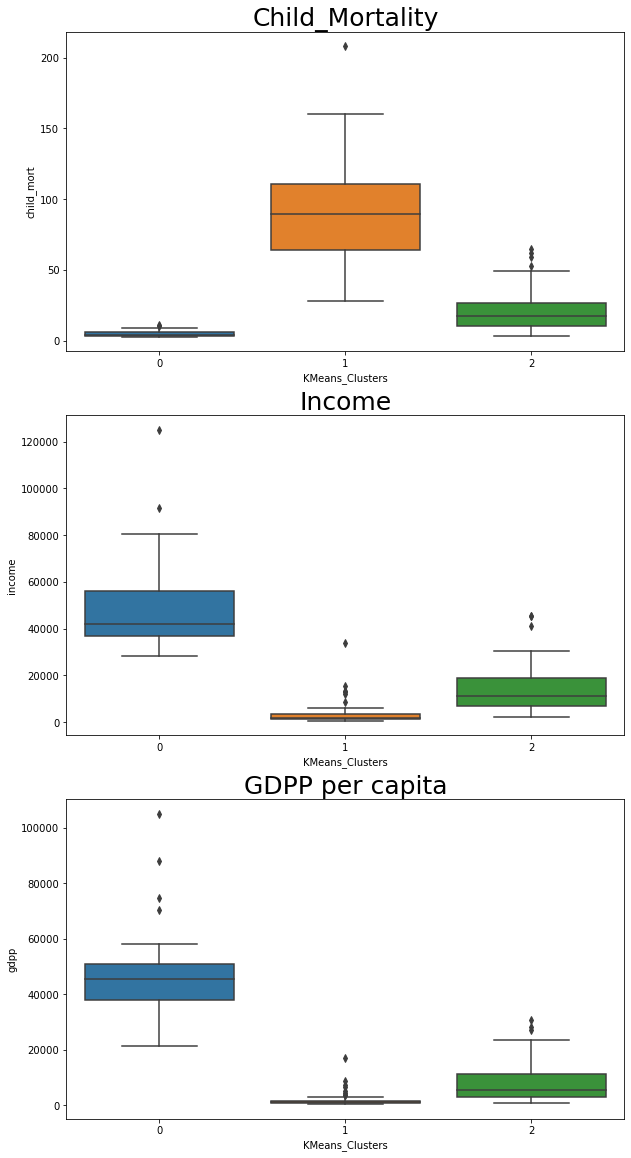

In [28]:
plt.figure(figsize=(10,20))
# Visualising with boxplot for child_mort, income and gdpp variables wrt Clusters

plt.subplot(3,1,1)                         
plt.title('Child_Mortality',fontsize=25)   
sns.boxplot(x=kmeans_df['KMeans_Clusters'],y=kmeans_df['child_mort'],data=kmeans_df)

plt.subplot(3,1,2)                         
plt.title('Income',fontsize=25)            
sns.boxplot(x=kmeans_df['KMeans_Clusters'],y=kmeans_df['income'],data=kmeans_df)

plt.subplot(3,1,3)                          
plt.title('GDPP per capita',fontsize=25)       
sns.boxplot(x=kmeans_df['KMeans_Clusters'],y=kmeans_df['gdpp'],data=kmeans_df)
             
            

- __Cluster 0 has GDPP and Income quiet high than cluster 1 and 2 where as has child mortality low__
- __Cluster 1 has high child moratality rate as compare to 0 and 2__
- __Cluster 2 has all values comparable__

In [29]:
#find number of developed country,developing country,under-developed country
Developed=kmeans_df[kmeans_df['KMeans_Clusters']==0]['country']
Under_Developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]['country']
Developing=kmeans_df[kmeans_df['KMeans_Clusters']==2]['country']

print('Number of Developing countries', len(Developing))
print('Number of Under-Developing countries', len(Under_Developing))
print('Number of Developed', len(Developed))


Number of Developing countries 91
Number of Under-Developing countries 48
Number of Developed 28


In [30]:
kmeans_df[kmeans_df.KMeans_Clusters==1].sort_values(by=["income","gdpp","child_mort"]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,1
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,1
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1


__Countries that need immmediate Aid are Congo, Dem. Rep., Liberia, Burundi, Niger, Central African Republic.__

In [31]:
print(Under_Developing)

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [32]:
print(Developing)

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 91, dtype: object


In [33]:
print(Developed)

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object


<AxesSubplot:xlabel='gdpp', ylabel='income'>

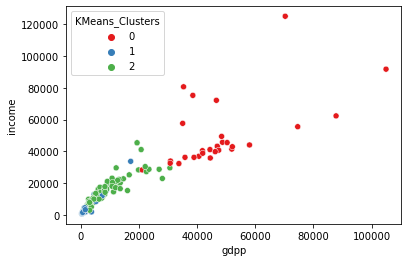

In [34]:
sns.scatterplot(x='gdpp', y='income', hue= 'KMeans_Clusters', data=kmeans_df, palette='Set1')


__Countries who has income more their GDPP is also large__

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

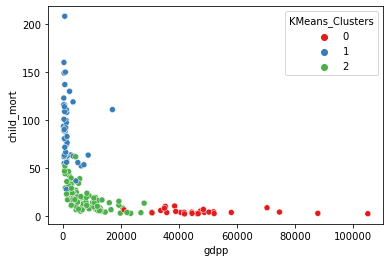

In [35]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'KMeans_Clusters', data=kmeans_df, palette='Set1')


__Countries who has low GDPP their child mortality is high__ 

<AxesSubplot:xlabel='income', ylabel='child_mort'>

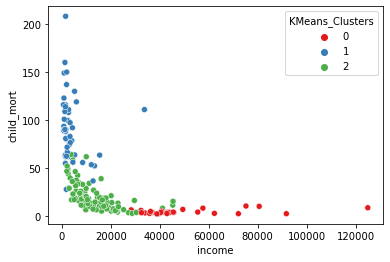

In [36]:
sns.scatterplot(x='income', y='child_mort', hue= 'KMeans_Clusters', data=kmeans_df, palette='Set1')

__The countries that as low income their child mortality rate is high__

## Hierarchical Clustering

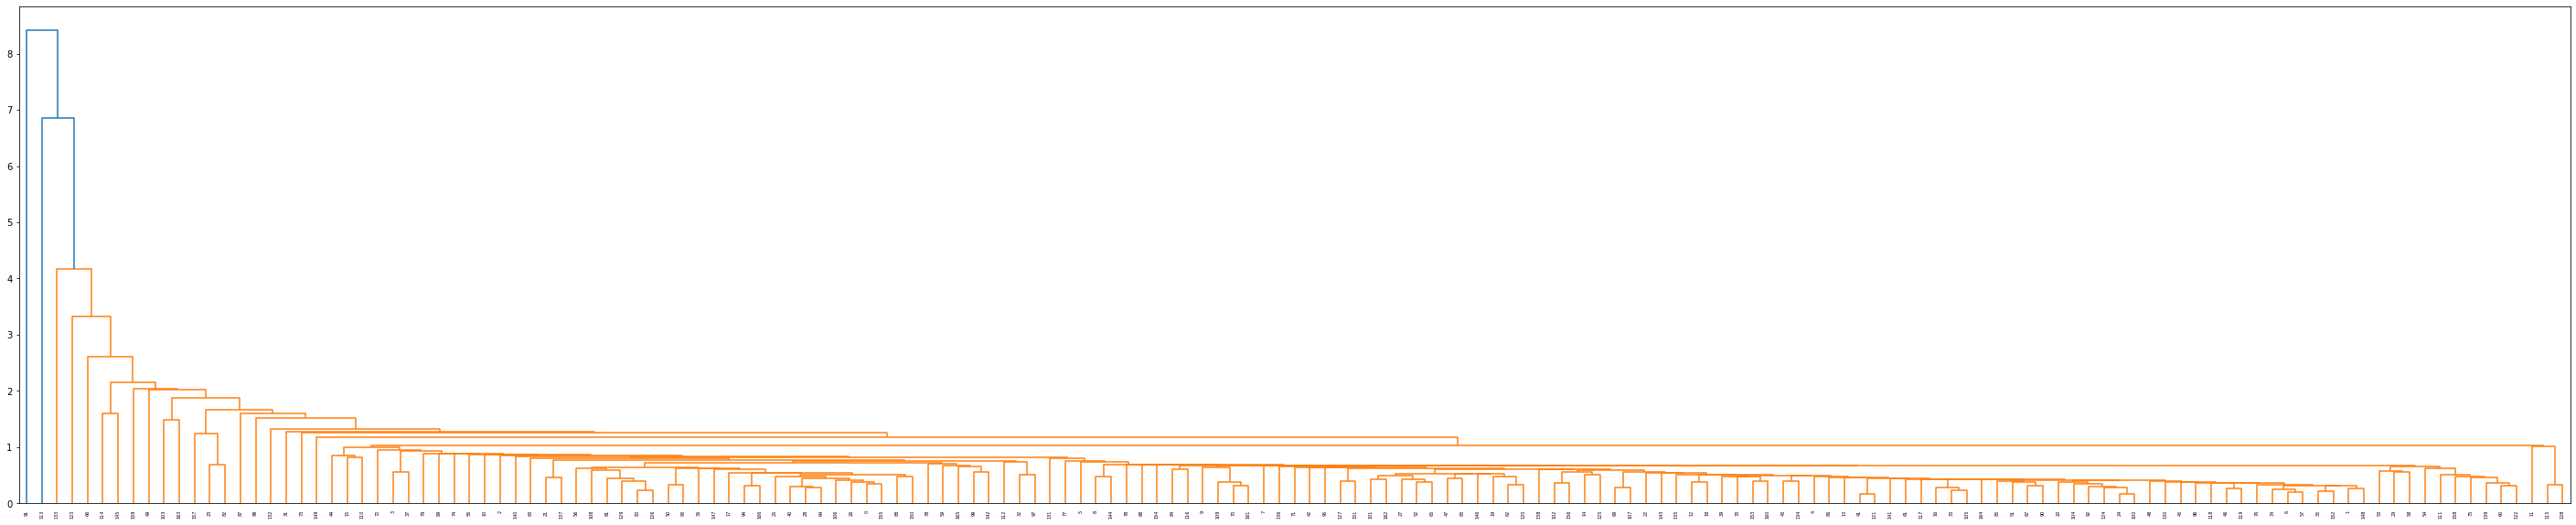

In [37]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# single linkage
plt.figure(figsize=(50, 10))
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

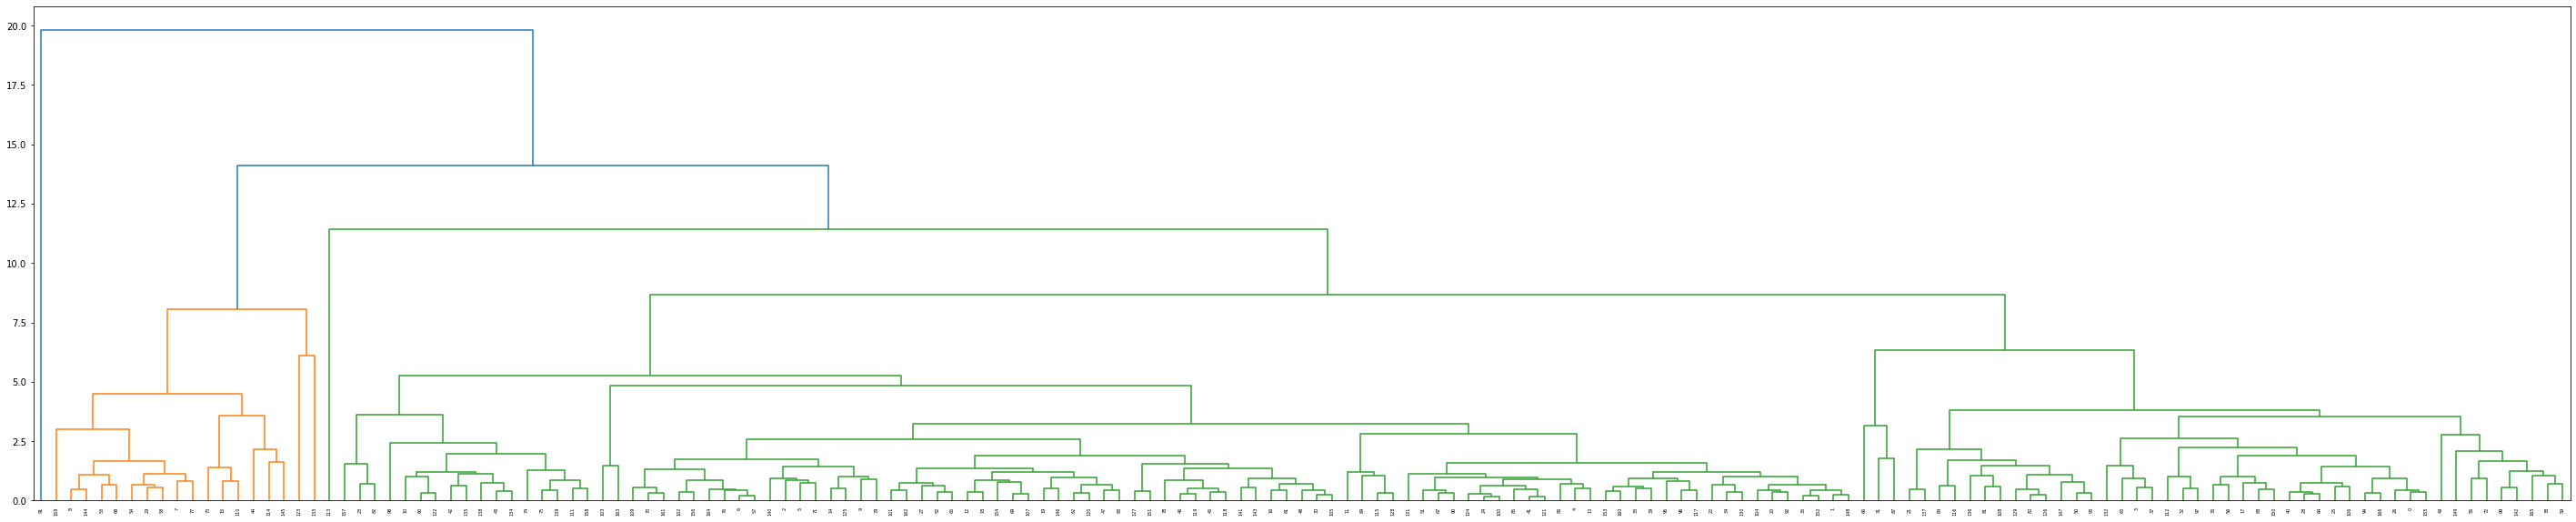

In [38]:
# complete linkage
plt.figure(figsize=(50, 10))
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()



In [39]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [40]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_

In [41]:
hcluster_df = pd.DataFrame(Country_df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,hcluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,2


## Visualization Hierarchical cluster

<AxesSubplot:title={'center':'GDPP per capita'}, xlabel='hcluster', ylabel='gdpp'>

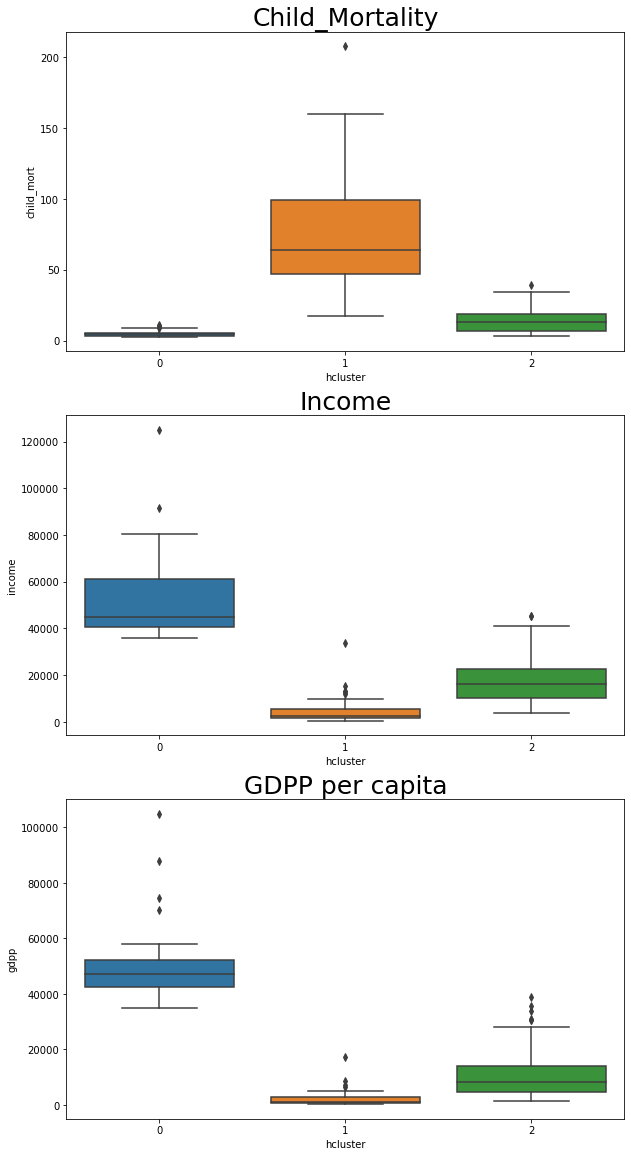

In [42]:
plt.figure(figsize=(10,20))
# Visualising with boxplot for child_mort, income and gdpp variables wrt cluster

plt.subplot(3,1,1)                         
plt.title('Child_Mortality',fontsize=25)   
sns.boxplot(x=hcluster_df['hcluster'],y=hcluster_df['child_mort'],data=hcluster_df)

plt.subplot(3,1,2)                        
plt.title('Income',fontsize=25)           
sns.boxplot(x=hcluster_df['hcluster'],y=hcluster_df['income'],data=hcluster_df)

plt.subplot(3,1,3)                           
plt.title('GDPP per capita',fontsize=25)       
sns.boxplot(x=hcluster_df['hcluster'],y=hcluster_df['gdpp'],data=hcluster_df)
             
            

- __Cluster 0 has GDPP and Income quiet high than cluster 1 and 2 where as has child mortality low__
- __Cluster 1 has high child moratality rate as compare to 0 and 2__
- __Cluster 2 has all values comparable__

In [43]:
#find number of developed country,developing country,under-developed country
Developed=hcluster_df[hcluster_df['hcluster']==0]['country']
Under_Developing=hcluster_df[hcluster_df['hcluster']==1]['country']
Developing=hcluster_df[hcluster_df['hcluster']==2]['country']

print('Number of Developing countries', len(Developing))
print('Number of Under-Developing countries', len(Under_Developing))
print('Number of Developed', len(Developed))

Number of Developing countries 75
Number of Under-Developing countries 70
Number of Developed 22


In [44]:
hcluster_df[hcluster_df.hcluster==1].sort_values(by=["income","gdpp","child_mort"]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters,hcluster
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,1
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1,1
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1,1
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,1
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,1,1
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,1,1
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,1,1
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488,1,1
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1,1


__Countries that need immmediate Aid are Congo, Dem. Rep., Liberia, Burundi, Niger, Central African Republic.__

In [45]:
print(Developing)

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
156                Ukraine
158         United Kingdom
160                Uruguay
163              Venezuela
164                Vietnam
Name: country, Length: 75, dtype: object


In [46]:
print(Under_Developing)

0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
18          Bhutan
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 70, dtype: object


In [47]:
col1 = list(Under_Developing)
col1

['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [48]:
print(Developed)

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
77                    Japan
82                   Kuwait
91               Luxembourg
110             Netherlands
114                  Norway
123                   Qatar
133               Singapore
144                  Sweden
145             Switzerland
157    United Arab Emirates
159           United States
Name: country, dtype: object


## Conclusion::

__K-means clustering :__
Countries that need direst need of aid: 48 countries.

__Hierarchical clustering :__
Countries that are direst need of aid: 70 countries.

It is observed that from both clustering, __hierarchical clustering__ gives precise information so it is better to good with countries from hierarchical clustering.

Countries that need immmediate Aid are __Congo, Dem. Rep., Liberia, Burundi, Niger, Central African Republic.__	

Final List of countries that need Aid are: 
'Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia'
